In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('..')

<h1> Getting familiar with the ct_simulator.Network object

In [1]:
from ct_simulator import Network
net = Network.get_random(netsize=50, k=10, weighted=False)
net.avg_degree()

10.0

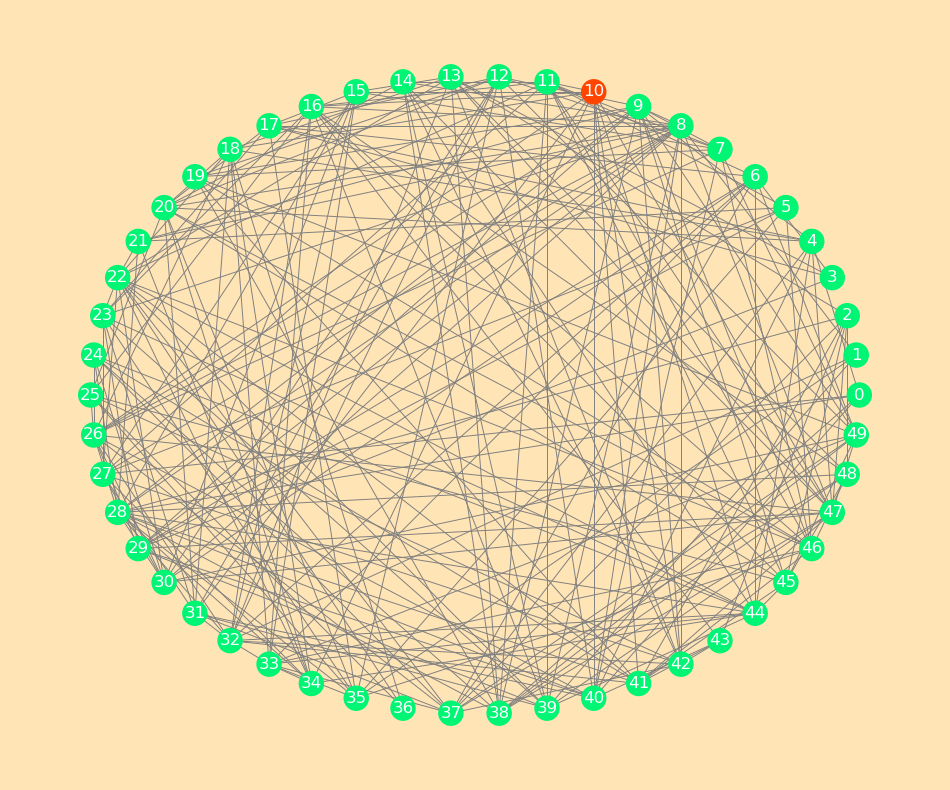

In [2]:
net.change_state(10, 'I')
net.draw(pos=None, layout='circular')
pos = net.pos

In [3]:
# This requires plotly to be installed
net.draw(plotter='plotly', pos=None, layout='spring', legend=1)

<Figure size 640x480 with 0 Axes>

In [4]:
# This requires pyvis to be installed
net.draw(plotter='pyvis', pos=None, layout='spring', legend=1)

<Figure size 640x480 with 0 Axes>

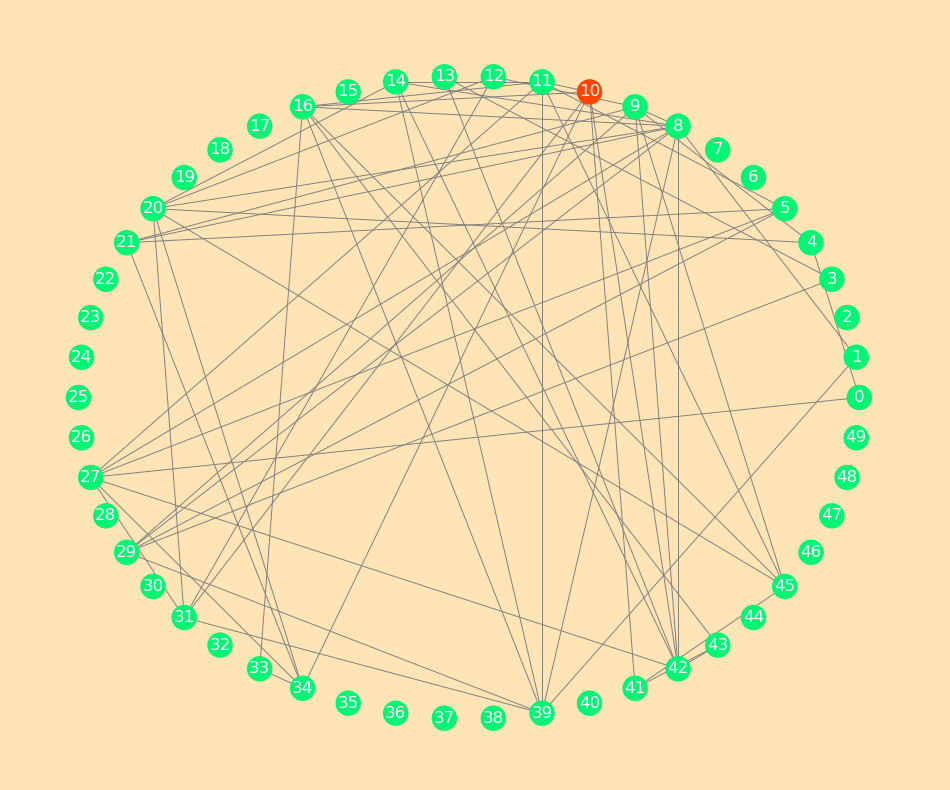

In [5]:
dual = Network.get_dual(net, keep_nodes_percent=0.5, conserve_overlap=False)
dual.draw(pos=pos)

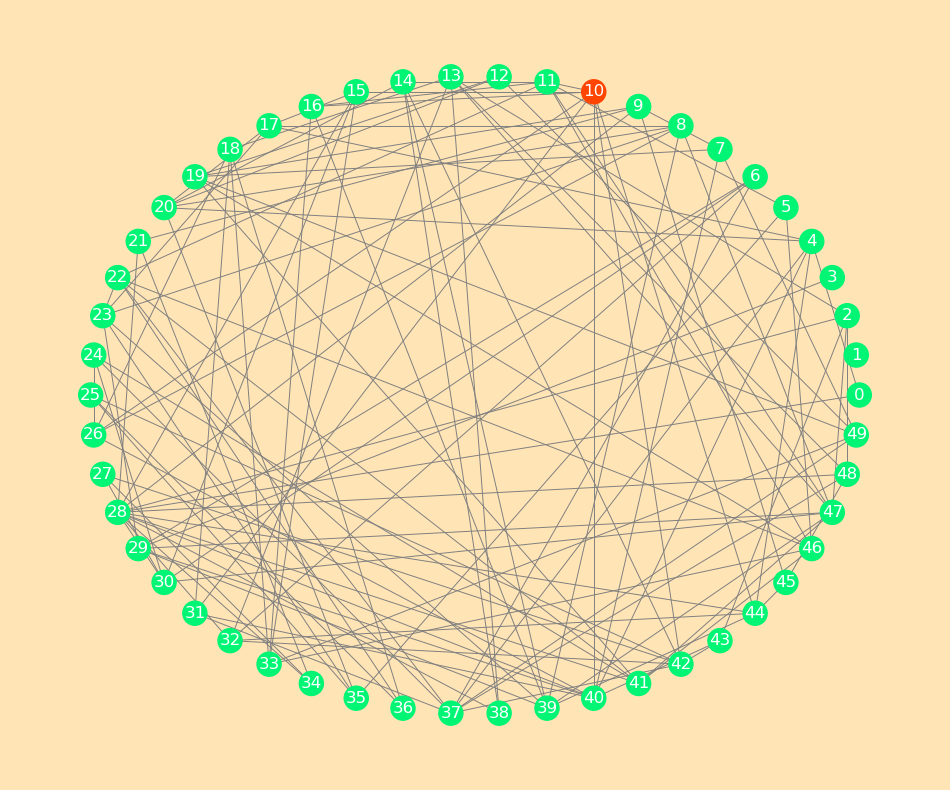

In [7]:
triad = Network.get_dual(net, net_overlap=0.5)
triad.draw(pos=pos)

In [8]:
l = list(triad.neighbors(10))
print(l, triad.node_counts[l[0]])

[31, 42, 44, 11, 15, 40, 16, 26] defaultdict(<class 'float'>, {'I': 1.0, 'S': 3.0})


<h1> Profiling

In [11]:
from ct_simulator import run_tracing
from ct_simulator.tracing.utils import Profiler
profiler = Profiler()
with profiler():
    run_tracing.run_api(netsize=500, k=10, isolate_s=True, trace_once=False, first_inf=.1, presample=20000, nettype='ws', \
                    p=.03, seed=2, rem_orphans=True, taut=.01, taut_two=.05, model='covid', netseed=13, \
                    multip=0, nnets=2, niters=1, dual=1, taur=0.1, noncomp=.001, overlap_two=.7, noncomp_after=14, 
                    uptake=.5, maintain_overlap=False, separate_traced=True, efforts=False,
                    draw=False, draw_iter=False, draw_layout='spring', sampling_type='min',
                    summary_print=0, summary_splits=100, r_window=7, avg_without_earlystop=True)
profiler.stat()


Experiment date: 2023-11-30--17-58/

Running simulation with parameters:
netsize = 500, k = 10, dual = 1, model = covid
overlap = 0.8, uptake = 0.5, maintain_overlap = False
taut = 0.01, taur = 0.1, noncomp = 0.001, noncomp_dependtime = True

----- Episode 0, simulating network no. 0 -----
                                                                     
Running iteration 0, with eps = 0.01:
---> Result: 279 total infected over time. %healthy = 0.442          
Iterations simulation progress: 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]
----- Episode 0, simulating network no. 1 -----
                                                                     
Running iteration 0, with eps = 0.01:
---> Result: 240 total infected over time. %healthy = 0.52           
Iterations simulation progress: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]
         4388250 function calls (4381430 primitive calls) in 2.805 seconds

   Ordered by: cumulative time, internal time

   ncalls  tottime  perca

# Process results from multiple runs (very useful for parallel simulations)
After correctly running one of the grid-based scripts located in the folder "scripts/", a folder containing ".json" files for each job in the array should become available. Alternatively, if no such experiment is run, one can utilize our simulation results from the SEIR-T paper located here: https://doi.org/10.6084/m9.figshare.14101946, extracting one of the ".json" containing folders in the archive.

After such a folder is available, one can quickly analyze this data by pointing the `process_json_results` function to it:



In [3]:
# here we process an experiment involving 10000 individuals, tracking different age groups: 1 adults, 2 seniors, None average population as per `group_percent`
from ct_simulator.tracing.utils import process_json_results
res_groups = process_json_results('data/run/batch12/', keys=('group',), print_id_fail=True)
res_groups.keys()

dict_keys([None, 1, 2])

In [10]:
# indexing along the keys selected in `process_json_results``
res_groups[None][1][1][0][0.1].keys()

dict_keys(['time', 'early-stopped', 'average-infected', 'average-max-infected', 'average-time-of-max-infected', 'average-total-infected', 'average-overall-infected', 'average-%healthy', 'average-total-traced', 'average-overall-traced', 'average-total-recovered', 'average-overall-recovered', 'average-hospital', 'average-max-hospital', 'average-time-of-max-hospital', 'average-total-hospital', 'average-overall-hospital', 'average-total-death', 'average-overall-death', 'average-total-infectious', 'average-overall-infectious', 'average-total-false-traced', 'average-overall-false-traced', 'average-overall-true-traced', 'average-total-false-negative', 'average-overall-false-negative', 'average-total-noncompliant', 'average-overall-noncompliant', 'r-trace', 'growth', 'r-eff', 'active-growth'])

In [11]:
res_groups[None][1][1][0][0.1]['average-max-hospital']

{'mean': 376.21,
 'std': 18.71,
 'mean_wo': 376.21,
 'std_wo': 18.71,
 'whislo': 327.0,
 'q1': 363.0,
 'med': 376.0,
 'q3': 387.0,
 'whishi': 422.0,
 'whislo_wo': 327.0,
 'q1_wo': 363.0,
 'med_wo': 376.0,
 'q3_wo': 387.0,
 'whishi_wo': 422.0}

In [13]:
# this experiment corresponds to experiment_five_SocialEvol.zip from the figshare repository, tracking the spread over the SocialEvolution network
from ct_simulator.tracing.utils import process_json_results
res_socialevol = process_json_results('data/run/social_slurm/')
res_socialevol.keys()

dict_keys([0.2, 0.5])

In [17]:
res_socialevol[0.2][2][1][1][0][0.5].keys()

dict_keys(['time', 'early-stopped', 'average-infected', 'average-max-infected', 'average-time-of-max-infected', 'average-total-infected', 'average-overall-infected', 'average-total-traced', 'average-overall-traced', 'average-total-recovered', 'average-overall-recovered', 'average-hospital', 'average-max-hospital', 'average-time-of-max-hospital', 'average-total-hospital', 'average-overall-hospital', 'average-total-death', 'average-overall-death', 'average-total-infectious', 'average-overall-infectious', 'average-total-false-traced', 'average-overall-false-traced', 'average-total-false-negative', 'average-overall-false-negative', 'average-total-noncompliant', 'average-overall-noncompliant', 'r-trace', 'growth', 'active-growth'])

In [18]:
res_socialevol[0.2][2][1][1][0][0.5]['average-max-infected']

{'mean': 27.34,
 'std': 3.51,
 'mean_wo': 27.36,
 'std_wo': 3.47,
 'whislo': 18.0,
 'q1': 25.0,
 'med': 27.0,
 'q3': 30.0,
 'whishi': 37.0,
 'whislo_wo': 18.0,
 'q1_wo': 25.0,
 'med_wo': 27.0,
 'q3_wo': 30.0,
 'whishi_wo': 37.0}